# Checkpoint 4: Random Numbers
## Sahaj Porwal, s1705173

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
class MyLifetimePdf:


    #............................
    #Constructors
    def __init__(self, tau, limlo = 0.0, limhi = 10.0, step = 0.01):
        self.tau = tau #lifetime to model
        self.limlo = limlo #lower limit to sample from
        self.limhi = limhi #upper limit to sample from
        
        #creating variables for sampling
        self.t = np.arange(limlo,limhi,step)#create probability based sampling space
        self.pdf = self.evaluate(self.t)#calc probabilities
        self.pdf = self.pdf/np.sum(self.pdf)#normalize pdf
        self.max = np.max(self.pdf)
 
    #............................
    #Method to return value of probability for lifetime t
    def evaluate(self, t):
         return np.exp(-t/self.tau)/self.tau


    #............................
    #Method to return probability of measurement of lifetime tau
    def prob_real(self):
        return self.evaluate(self.tau)
    
    
    #............................
    #Method to return a random number with a exponential distribution in range t = limlo to limhi
    def __next__( self ):
        return np.random.choice(self.t,p = self.pdf)
    
    
    #............................
    #Method to do numerical integration
    #This is written in a very simplistic way.
    

    def integralNumericBox( self, ilo, ihi ):

        npoints = 10000000
        ninside = 0
        lo = float(ilo)
        hi = float(ihi)

        for i in range(npoints):
            if(i%1000000 == 0):
                print(i,' done')
            x = lo + np.random.uniform()*(hi-lo)
            y = np.random.uniform()*self.max
            if( y < self.evaluate(x)): ninside = ninside+1

        Atot = (hi-lo)*self.max
        eff = float(ninside)/float(npoints)
        
        #Area
        Area = Atot * eff
        #Binomial error
        Error = Atot*np.sqrt(eff*(1-eff)/npoints)

        return Area, Error
            
    #............................
    #Method to do numerical integration
    #This is written in a very simplistic way.
            
            
    def integralNumericAvg( self, ilo, ihi ):
        
        npoints = 10000000
        ninside = 0
        lo = float(ilo)
        hi = float(ihi)
        sum = 0.
        
        for i in range(npoints):
            if(i%1000000 == 0):
                print(i,' done')
            x = lo + np.random.uniform()*(hi-lo)
            sum+= self.evaluate(x)
        
        Area = (hi-lo)*sum/npoints
        Error = Area * np.sqrt(npoints)/npoints
        
        return Area, Error
    


    #............................
    #Method to do analytic integration
    # This is lazt version wiuch assumed limits are very large
    # So lo and hi are ignored

    def integralAnalytic( self, lo, hi ):
        integral  = 1.
        #integral = self.width*math.sqrt(2.0*math.pi )
        return integral
    
def plothist(gpts,sim):
    #generate histogram, with expected curve for comparison
    t = sim.t
    pt = sim.evaluate(t)
    plt.figure()
    plt.hist(gpts,density=True,bins=int(np.sqrt(len(gpts))))
    plt.plot(t,pt)
    plt.show()
    return


def t_est(data):
    #estimate the lifetime using mean of generated data
    #different cases for single experiment vs multiple
    if(len(data.shape) == 1):
        return np.mean(data)
    else:
        return np.mean(data,axis = 1)

In [22]:
#Initialising parameters
points = 1000
nsamples = 500
bins = int(np.sqrt(points))
tau = 2.2
limlo = 0.0
limhi = 10.0
step = 0.01

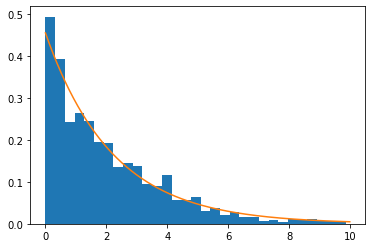

In [23]:
#Generating and plotting points
simulator = MyLifetimePdf(tau, limlo = limlo, limhi = limhi,step = step)
data1 = []
for i in range(points):
    data1.append(next(simulator))
data1 = np.array(data1)
plothist(data1,simulator)

In [24]:
print('Estimated lifetime ~ ',np.round(t_est(data1),decimals = 2))

Estimated lifetime ~  2.03


In [25]:
simulator = MyLifetimePdf(tau, limlo = limlo, limhi = limhi)

data500 = np.zeros((nsamples,points))
for i in range(nsamples):
    if(i%100 == 0):
        print(i,' experiments created')
    for j in range(points):
        data500[i][j] = next(simulator)
data500.shape   

0  experiments created
100  experiments created
200  experiments created
300  experiments created
400  experiments created


(500, 1000)

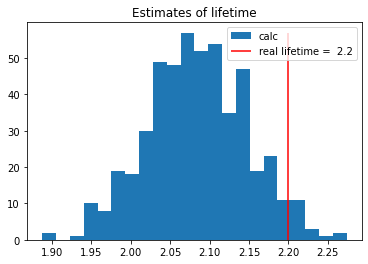

In [26]:
t_ests = t_est(data500)
hist, _ , _= plt.hist(t_ests,bins = int(np.sqrt(nsamples)), label = 'calc')
plt.vlines(tau,ymin = 0.0,ymax = np.max(hist),color = 'r',label = 'real lifetime =  '+str(tau))
plt.legend()
plt.title('Estimates of lifetime')
plt.show()

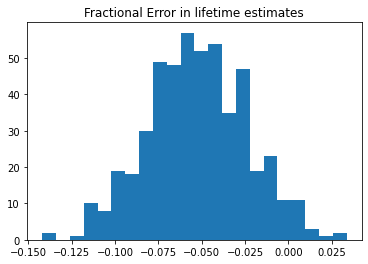

In [27]:
fracerrs = (t_ests - tau)/tau
plt.hist(fracerrs,bins = int(np.sqrt(nsamples)))
plt.title('Fractional Error in lifetime estimates')
plt.show()

In [28]:
AvgFracErr = np.mean(fracerrs)
print('Average fractional error: ',np.round(AvgFracErr,decimals = 2))

Average fractional error:  -0.05


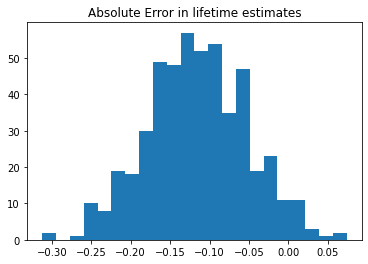

In [29]:
errs = (t_ests - tau)
plt.hist(errs,bins = int(np.sqrt(nsamples)))
plt.title('Absolute Error in lifetime estimates')
plt.show()

In [30]:
#Errors
AvgErr = np.mean(errs)
std = np.std(t_ests)/nsamples
print('Average error(bias) = ',np.round(AvgErr,decimals = 2))
print('fraction bias: ',np.round(AvgErr/tau, decimals = 2))
print('Precision: ', std)

Average error(bias) =  -0.12
fraction bias:  -0.05
Precision:  0.00012678537205438803


Yes, the method is biased. Average negative bias of ~ 5%. This is due to the missing tail-end of the function(ie. cutting off the function at t = 10.0, while function domain extends to infinity).
Trying to run with double the points for the same number of experiments or double the experiments with the same number of points or with both of these changes(double samples for double points), reproduces the fraction bias, indicating that it is intrinsic to the method

-------------------------------------------------------------------------------

---

In [31]:
#Alternative method to sample, more difficult to sample from limited domain range
np.random.exponential(scale = tau)

0.13446266821585176

---